In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
from scipy.io import mmread
import numpy as np
import anndata as ad
import os
import igraph
import leidenalg
from collections import defaultdict
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
adata = sc.read_h5ad("HTAPP_analysis.h5ad")
adata

AnnData object with n_obs × n_vars = 279730 × 4985
    obs: 'patient_id', 'type', 'age', 'n_genes', 'louvain'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'age_colors', 'hvg', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
adata.obs['type'].value_counts()

type
ductal     264468
lobular     15262
Name: count, dtype: int64

ranking genes
    finished: added to `.uns['t-test']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


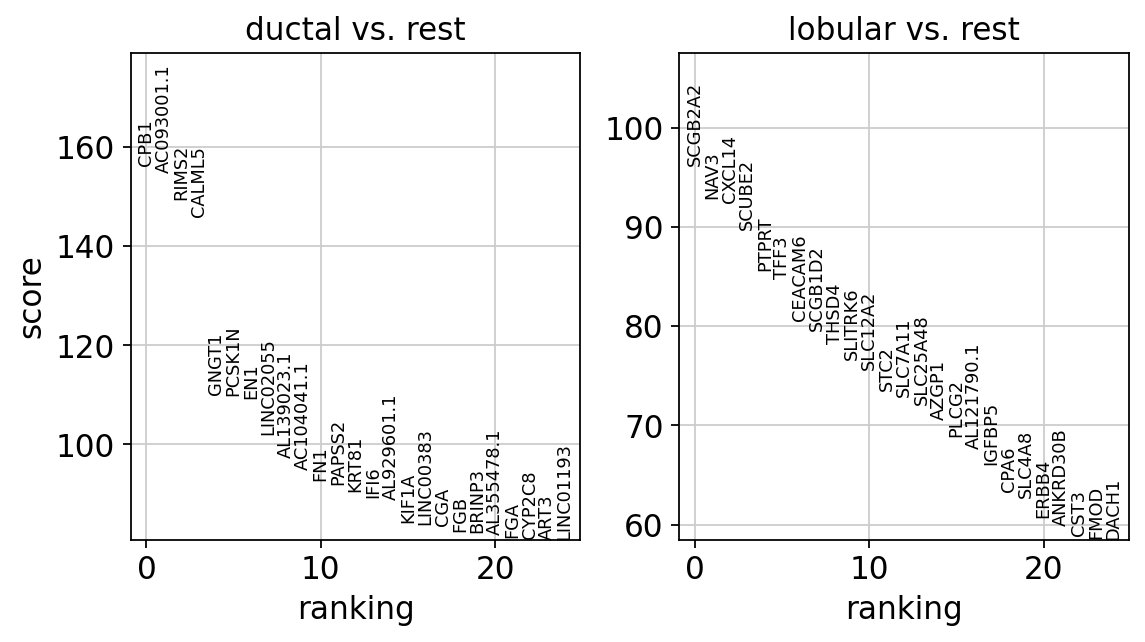

In [5]:
sc.tl.rank_genes_groups(adata, 'type', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")

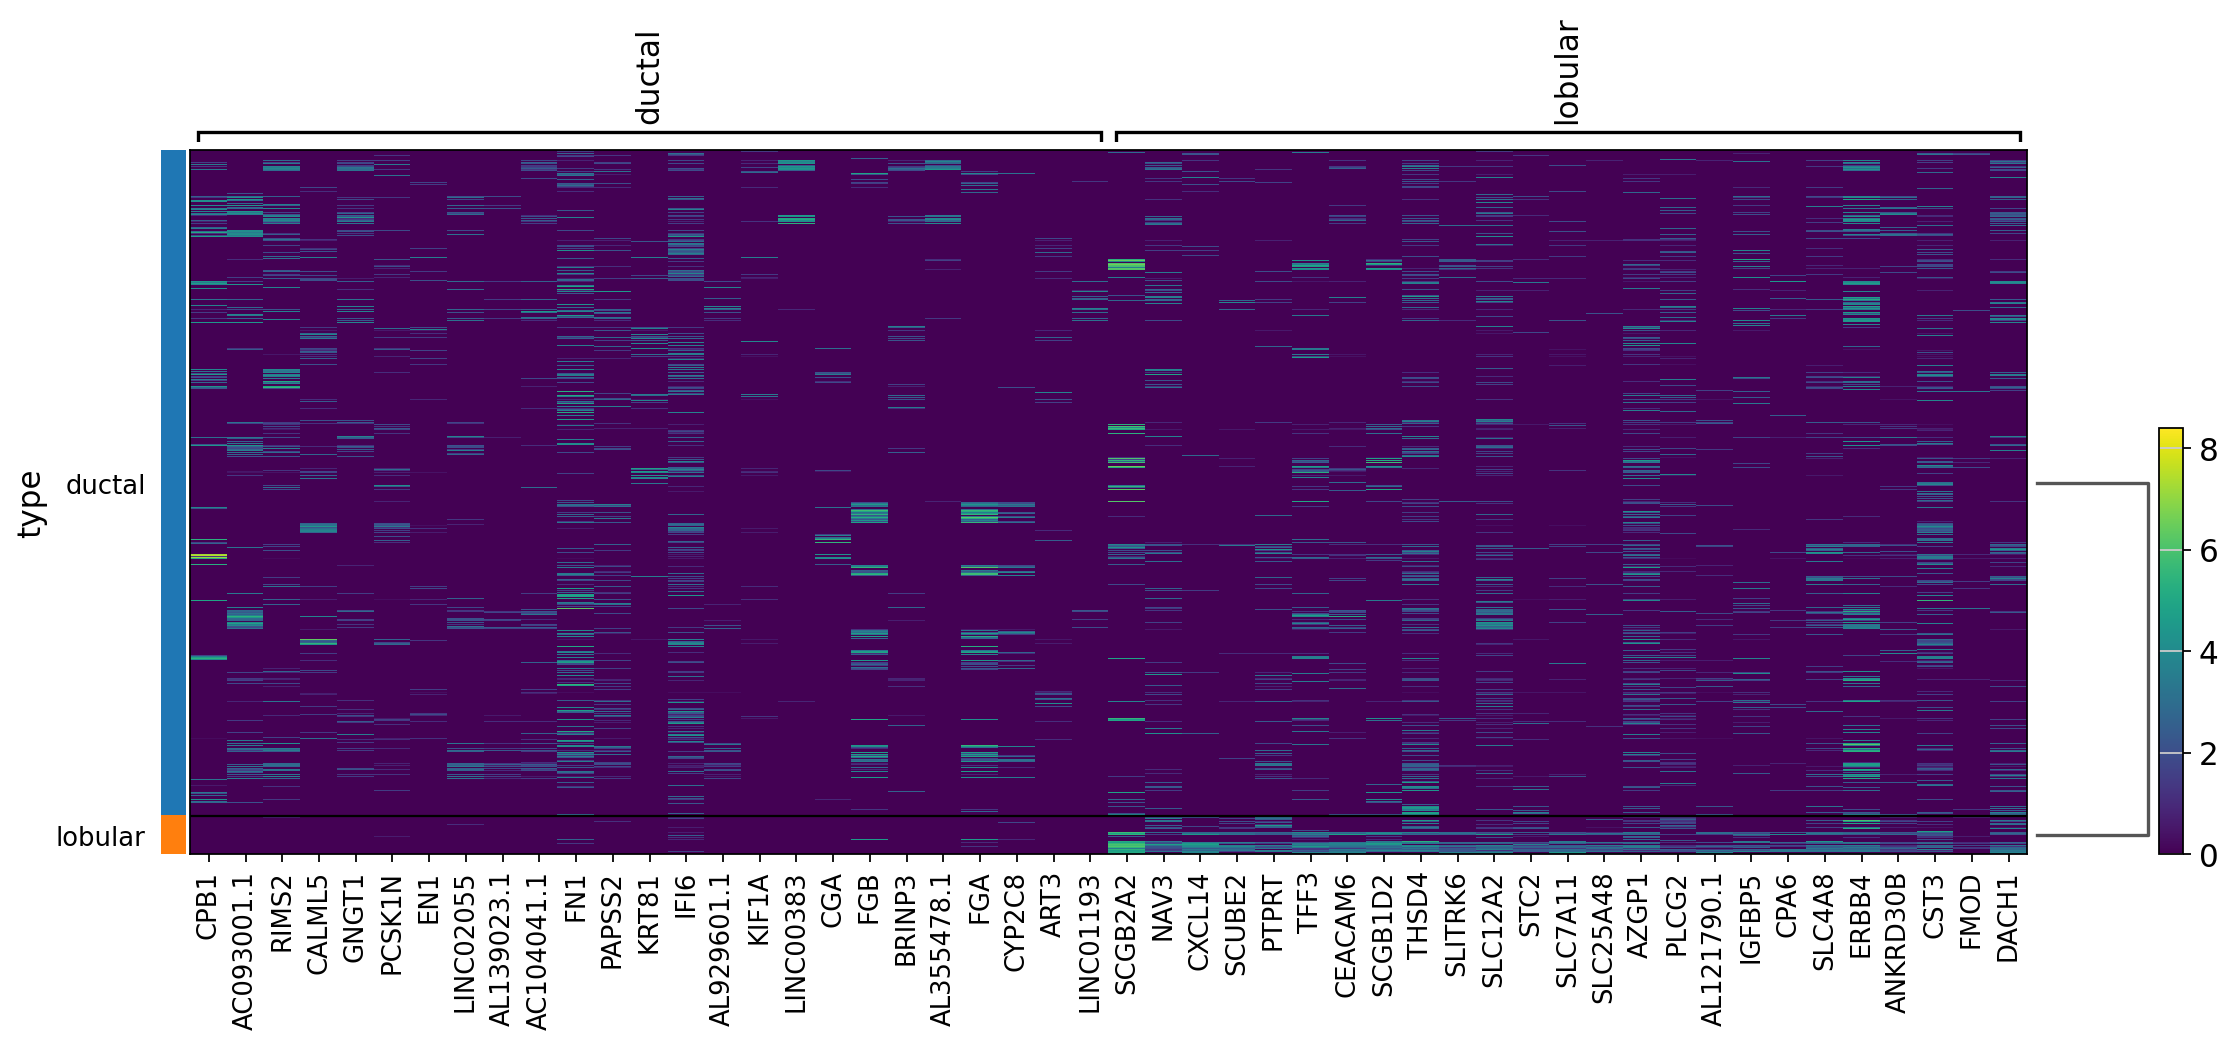

In [9]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=25, key="t-test", groupby="type", show_gene_labels=True)

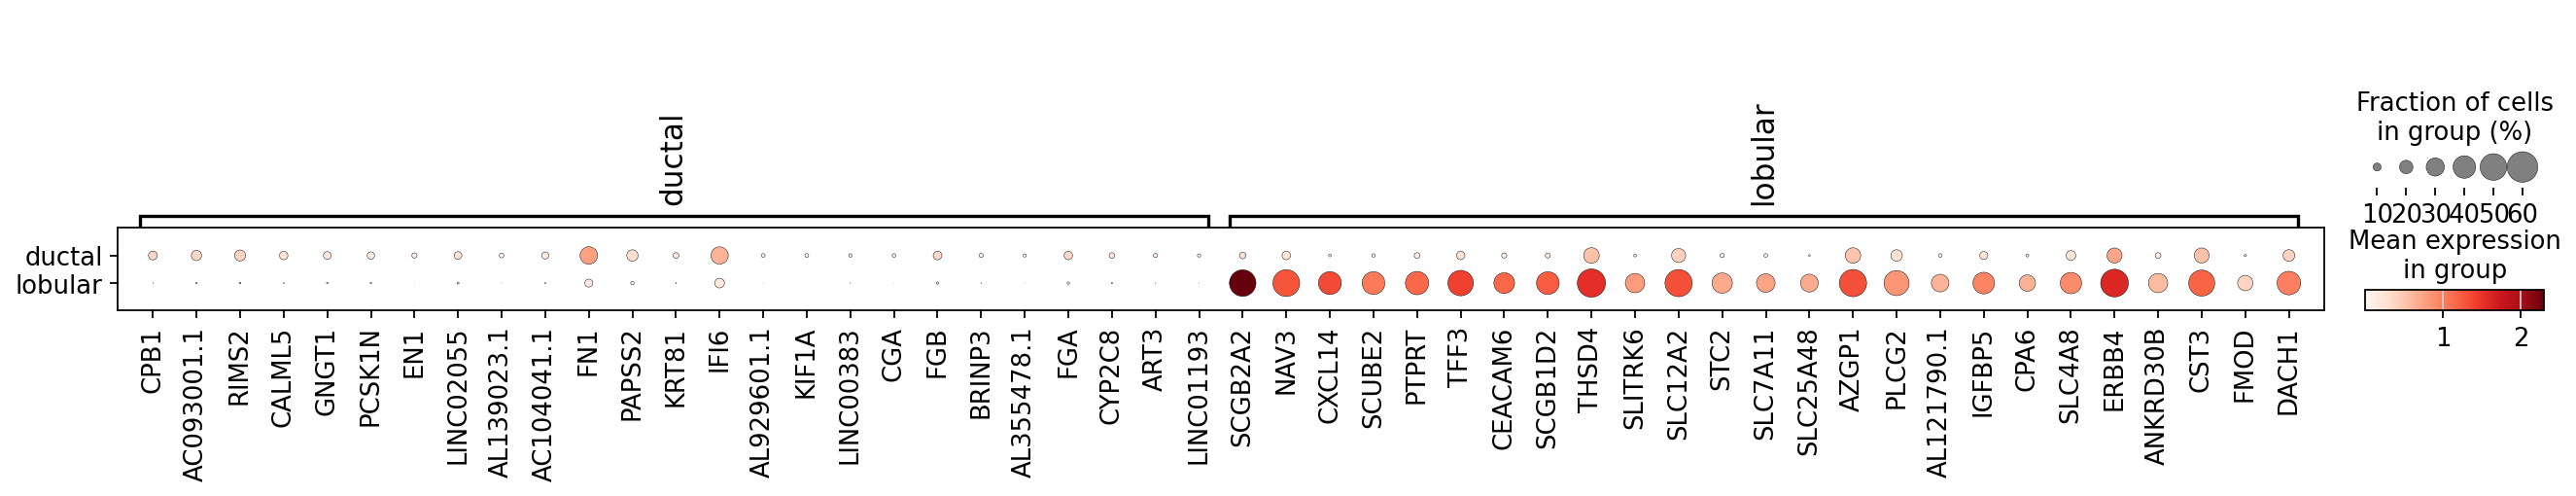

In [10]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=25, key="t-test", groupby="type")